# シダ

[バーンズリーのシダ
](https://ja.wikipedia.org/wiki/%E3%83%90%E3%83%BC%E3%83%B3%E3%82%BA%E3%83%AA%E3%83%BC%E3%81%AE%E3%82%B7%E3%83%80)

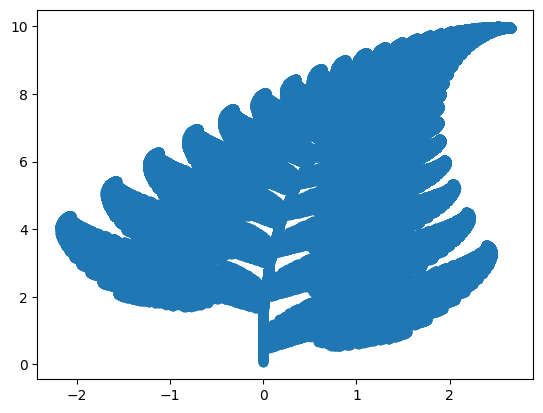

In [51]:
from typing import Sequence
import random
import array

class Affine:
    def __init__(self, w11, w12, w21, w22, b1, b2):
        self.w11 = w11
        self.w12 = w12
        self.w21 = w21
        self.w22 = w22
        self.b1 = b1
        self.b2 = b2
    def __call__(self, x, y):
        return (
            self.w11 * x + self.w12 * y + self.b1,
            self.w21 * x + self.w22 * y + self.b2
        )

aff1 = Affine(
    w11=0., w12=0.,
    w21=0., w22=0.16,
    b1 = 0., b2=0.,
)

aff2 = Affine(
    w11=0.85, w12=0.04,
    w21=-0.04, w22=0.85,
    b1 = 0., b2=1.6
)

aff3 = Affine(
    w11 = 0.2, w12 = -0.26,
    w21 = 0.23, w22=0.22,
    b1 = 0., b2 = 1.6,
)

aff4 = Affine(
    w11 = -0.15, w12 = 0.28,
    w21 = 0.26, w22=0.24,
    b1 = 0., b2 = 0.44
)

aff1 = Affine(
    0., 0.,
    0., 0.16,
    0., 0.,
)

aff2 = Affine(
    0.85, 0.04,
    -0.04, 0.85,
    0., 1.6
)

aff3 = Affine(
    0.2, -0.26,
    0.23, 0.22,
    0., 1.6,
)

aff4 = Affine(
    -0.15, 0.28,
    0.26, 0.24,
    0., 0.44
)

def select_index():
    r = random.random()
    if r < 0.01:
        return 0
    elif 0.01 <= r < 0.86:
        return 1
    elif 0.86 <= r < 0.93:
        return 2
    else:
        return 3

def F64(x):
    return x

def gen_fractal(transforms: Sequence):
    N = 100000
    xs = array.array("d", [1. for _ in range(N)])
    ys = array.array("d", [1. for _ in range(N)])
    x = 0.
    y = 0.
    for i in range(N):
        aff = None
        r = random.random()
        if r < F64(0.01):
            aff = aff1
        elif F64(0.01) <= r < F64(0.86):
            aff = aff2
        elif F64(0.86) <= r < F64(0.93):
            aff = aff3
        else:
            aff = aff4
        x, y = aff(x, y)
        xs[i] = x
        ys[i] = y
    return xs, ys

transforms = (aff1, aff2, aff3, aff4)

xs, ys = gen_fractal(transforms)

from matplotlib import pyplot as plt

plt.scatter(xs, ys)
plt.show()

In [ ]:
%timeit gen_fractal(transforms)